In [49]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
import joblib
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix,accuracy_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import RandomizedSearchCV

In [2]:
df = pd.read_csv("cicids.csv")

In [3]:
df=df.drop([' Fwd Header Length.1'], axis=1)

In [4]:
df

,Destination Port,Flow Duration,Total Fwd Packets,Total Backward Packets,Total Length of Fwd Packets,Total Length of Bwd Packets,Fwd Packet Length Max,Fwd Packet Length Min,Fwd Packet Length Mean,Fwd Packet Length Std,...,min_seg_size_forward,Active Mean,Active Std,Active Max,Active Min,Idle Mean,Idle Std,Idle Max,Idle Min,Label
0,54865,3,2,0,12,0,6,6,6.0,0.00000,...,20,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN
1,55054,109,1,1,6,6,6,6,6.0,0.00000,...,20,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN
2,55055,52,1,1,6,6,6,6,6.0,0.00000,...,20,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN
3,46236,34,1,1,6,6,6,6,6.0,0.00000,...,20,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN
4,54863,3,2,0,12,0,6,6,6.0,0.00000,...,20,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1042552,53,32215,4,2,112,152,28,28,28.0,0.00000,...,20,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN
1042553,53,324,2,2,84,362,42,42,42.0,0.00000,...,20,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN
1042554,58030,82,2,1,31,6,31,0,15.5,21.92031,...,32,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN
1042555,53,1048635,6,2,192,256,32,32,32.0,0.00000,...,20,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN


# Analyzing the dataset

In [5]:
df.groupby(' Label')[' Label'].count()

 Label
BENIGN      629074
DDoS        128022
DoS         194642
PortScan     90819
Name:  Label, dtype: int64

In [6]:
df = df.replace([np.inf, -np.inf], np.nan).dropna(axis=0)

In [8]:
names=list(df.iloc[:,:77].keys())

In [7]:
scaler = MinMaxScaler()

In [9]:
scaled = scaler.fit_transform(df.iloc[:,:77])
print(scaled)

[[8.37224562e-01 1.33333321e-07 4.90335488e-06 ... 0.00000000e+00
  0.00000000e+00 0.00000000e+00]
 [8.40108649e-01 1.01666657e-06 0.00000000e+00 ... 0.00000000e+00
  0.00000000e+00 0.00000000e+00]
 [8.40123909e-01 5.41666617e-07 0.00000000e+00 ... 0.00000000e+00
  0.00000000e+00 0.00000000e+00]
 ...
 [8.85521577e-01 7.91666594e-07 4.90335488e-06 ... 0.00000000e+00
  0.00000000e+00 0.00000000e+00]
 [8.08765183e-04 8.73873253e-03 2.45167744e-05 ... 0.00000000e+00
  0.00000000e+00 0.00000000e+00]
 [8.08765183e-04 7.91266594e-04 1.47100646e-05 ... 0.00000000e+00
  0.00000000e+00 0.00000000e+00]]


In [10]:
scaled=pd.DataFrame(scaled, columns=names)

In [11]:
scaled

,Destination Port,Flow Duration,Total Fwd Packets,Total Backward Packets,Total Length of Fwd Packets,Total Length of Bwd Packets,Fwd Packet Length Max,Fwd Packet Length Min,Fwd Packet Length Mean,Fwd Packet Length Std,...,act_data_pkt_fwd,min_seg_size_forward,Active Mean,Active Std,Active Max,Active Min,Idle Mean,Idle Std,Idle Max,Idle Min
0,0.837225,1.333333e-07,0.000005,0.000000,0.000010,0.000000e+00,0.000242,0.002906,0.001293,0.000000,...,0.000005,0.344262,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.840109,1.016667e-06,0.000000,0.000004,0.000005,9.569378e-09,0.000242,0.002906,0.001293,0.000000,...,0.000000,0.344262,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.840124,5.416666e-07,0.000000,0.000004,0.000005,9.569378e-09,0.000242,0.002906,0.001293,0.000000,...,0.000000,0.344262,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.705548,3.916666e-07,0.000000,0.000004,0.000005,9.569378e-09,0.000242,0.002906,0.001293,0.000000,...,0.000000,0.344262,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.837194,1.333333e-07,0.000005,0.000000,0.000010,0.000000e+00,0.000242,0.002906,0.001293,0.000000,...,0.000005,0.344262,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1041894,0.000809,2.685666e-04,0.000015,0.000007,0.000091,2.424242e-07,0.001128,0.013559,0.006033,0.000000,...,0.000015,0.344262,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1041895,0.000809,2.808333e-06,0.000005,0.000007,0.000069,5.773525e-07,0.001692,0.020339,0.009050,0.000000,...,0.000005,0.344262,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1041896,0.885522,7.916666e-07,0.000005,0.000004,0.000025,9.569378e-09,0.001249,0.000000,0.003340,0.003275,...,0.000000,0.540984,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1041897,0.000809,8.738733e-03,0.000025,0.000007,0.000157,4.082935e-07,0.001289,0.015496,0.006895,0.000000,...,0.000025,0.344262,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [12]:
scaled['Label']=df[' Label']

In [13]:
scaled

,Destination Port,Flow Duration,Total Fwd Packets,Total Backward Packets,Total Length of Fwd Packets,Total Length of Bwd Packets,Fwd Packet Length Max,Fwd Packet Length Min,Fwd Packet Length Mean,Fwd Packet Length Std,...,min_seg_size_forward,Active Mean,Active Std,Active Max,Active Min,Idle Mean,Idle Std,Idle Max,Idle Min,Label
0,0.837225,1.333333e-07,0.000005,0.000000,0.000010,0.000000e+00,0.000242,0.002906,0.001293,0.000000,...,0.344262,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,BENIGN
1,0.840109,1.016667e-06,0.000000,0.000004,0.000005,9.569378e-09,0.000242,0.002906,0.001293,0.000000,...,0.344262,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,BENIGN
2,0.840124,5.416666e-07,0.000000,0.000004,0.000005,9.569378e-09,0.000242,0.002906,0.001293,0.000000,...,0.344262,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,BENIGN
3,0.705548,3.916666e-07,0.000000,0.000004,0.000005,9.569378e-09,0.000242,0.002906,0.001293,0.000000,...,0.344262,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,BENIGN
4,0.837194,1.333333e-07,0.000005,0.000000,0.000010,0.000000e+00,0.000242,0.002906,0.001293,0.000000,...,0.344262,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,BENIGN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1041894,0.000809,2.685666e-04,0.000015,0.000007,0.000091,2.424242e-07,0.001128,0.013559,0.006033,0.000000,...,0.344262,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,BENIGN
1041895,0.000809,2.808333e-06,0.000005,0.000007,0.000069,5.773525e-07,0.001692,0.020339,0.009050,0.000000,...,0.344262,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,BENIGN
1041896,0.885522,7.916666e-07,0.000005,0.000004,0.000025,9.569378e-09,0.001249,0.000000,0.003340,0.003275,...,0.540984,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,BENIGN
1041897,0.000809,8.738733e-03,0.000025,0.000007,0.000157,4.082935e-07,0.001289,0.015496,0.006895,0.000000,...,0.344262,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,BENIGN


C:\Users\prash\AppData\Local\Temp\ipykernel_3812\1557876135.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(scaled.corr())


<AxesSubplot: >

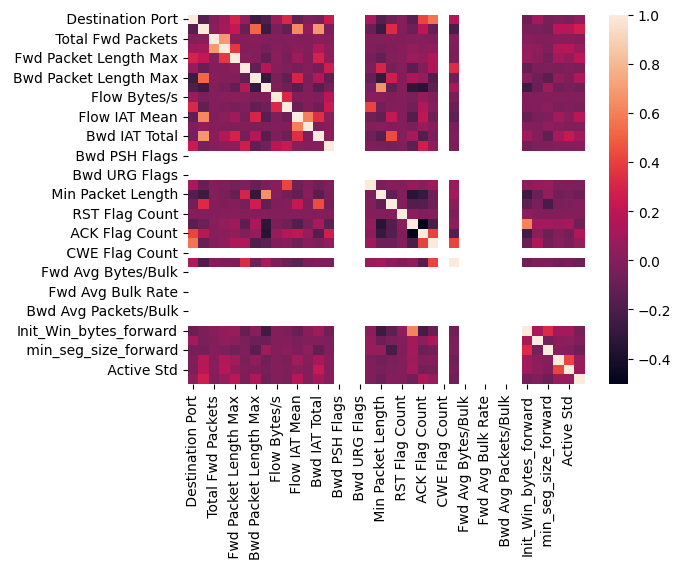

In [22]:
sns.heatmap(scaled.corr())

In [15]:
corr_matrix = scaled.corr().abs()
corr_matrix

C:\Users\prash\AppData\Local\Temp\ipykernel_3812\1450045545.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr_matrix = scaled.corr().abs()


,Destination Port,Flow Duration,Total Fwd Packets,Total Backward Packets,Total Length of Fwd Packets,Total Length of Bwd Packets,Fwd Packet Length Max,Fwd Packet Length Min,Fwd Packet Length Mean,Fwd Packet Length Std,...,act_data_pkt_fwd,min_seg_size_forward,Active Mean,Active Std,Active Max,Active Min,Idle Mean,Idle Std,Idle Max,Idle Min
Destination Port,1.000000,0.157036,0.003908,0.003363,0.089045,0.002989,0.290101,0.065984,0.340747,0.301904,...,0.002999,0.041774,0.017115,0.038161,0.035903,0.004368,0.134710,0.041906,0.125343,0.141433
Flow Duration,0.157036,1.000000,0.015559,0.014238,0.108580,0.011530,0.223748,0.103777,0.134971,0.201298,...,0.012044,0.055663,0.177239,0.173826,0.236756,0.129436,0.857087,0.264598,0.873493,0.820578
Total Fwd Packets,0.003908,0.015559,1.000000,0.998900,0.684838,0.995852,0.004505,0.002161,0.000137,0.000763,...,0.999699,0.004415,0.007213,0.007790,0.009949,0.004724,0.000811,0.000519,0.000890,0.000693
Total Backward Packets,0.003363,0.014238,0.998900,1.000000,0.684172,0.992627,0.004417,0.001578,0.000181,0.000602,...,0.998357,0.004121,0.006045,0.005845,0.007975,0.004511,0.000120,0.000028,0.000116,0.000082
Total Length of Fwd Packets,0.089045,0.108580,0.684838,0.684172,1.000000,0.678660,0.372810,0.001701,0.357691,0.335732,...,0.684236,0.026450,0.154549,0.183151,0.210402,0.088143,0.040546,0.064085,0.049269,0.030639
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Active Min,0.004368,0.129436,0.004724,0.004511,0.088143,0.003127,0.101948,0.024682,0.091827,0.097924,...,0.003541,0.018670,0.908695,0.012346,0.626160,1.000000,0.104232,0.038246,0.110979,0.097314
Idle Mean,0.134710,0.857087,0.000811,0.000120,0.040546,0.000074,0.163720,0.087273,0.111882,0.164190,...,0.000974,0.048351,0.094675,0.001905,0.056973,0.104232,1.000000,0.118729,0.988732,0.988671
Idle Std,0.041906,0.264598,0.000519,0.000028,0.064085,0.000162,0.194241,0.031633,0.194579,0.200980,...,0.000355,0.080121,0.064199,0.068491,0.061901,0.038246,0.118729,1.000000,0.263930,0.031350
Idle Max,0.125343,0.873493,0.000890,0.000116,0.049269,0.000040,0.187112,0.089659,0.137237,0.188609,...,0.000881,0.057012,0.110680,0.021300,0.074742,0.110979,0.988732,0.263930,1.000000,0.955403


In [16]:
upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(np.bool))
to_drop = [column for column in upper.columns if any(upper[column] > 0.7)]
to_drop

C:\Users\prash\AppData\Local\Temp\ipykernel_3812\540890198.py:2: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(np.bool))


[' Total Backward Packets',
 ' Total Length of Bwd Packets',
 ' Fwd Packet Length Mean',
 ' Fwd Packet Length Std',
 ' Bwd Packet Length Mean',
 ' Bwd Packet Length Std',
 ' Flow IAT Std',
 ' Flow IAT Max',
 'Fwd IAT Total',
 ' Fwd IAT Mean',
 ' Fwd IAT Std',
 ' Fwd IAT Max',
 ' Fwd IAT Min',
 ' Bwd IAT Mean',
 ' Bwd IAT Std',
 ' Bwd IAT Max',
 ' Bwd IAT Min',
 ' Fwd Header Length',
 ' Bwd Header Length',
 'Fwd Packets/s',
 ' Max Packet Length',
 ' Packet Length Mean',
 ' Packet Length Std',
 ' Packet Length Variance',
 ' SYN Flag Count',
 ' ECE Flag Count',
 ' Average Packet Size',
 ' Avg Fwd Segment Size',
 ' Avg Bwd Segment Size',
 'Subflow Fwd Packets',
 ' Subflow Fwd Bytes',
 ' Subflow Bwd Packets',
 ' Subflow Bwd Bytes',
 ' act_data_pkt_fwd',
 ' Active Max',
 ' Active Min',
 'Idle Mean',
 ' Idle Max',
 ' Idle Min']

In [97]:
print(to_drop)

[' Total Backward Packets', ' Total Length of Bwd Packets', ' Fwd Packet Length Mean', ' Fwd Packet Length Std', ' Bwd Packet Length Mean', ' Bwd Packet Length Std', ' Flow IAT Std', ' Flow IAT Max', 'Fwd IAT Total', ' Fwd IAT Mean', ' Fwd IAT Std', ' Fwd IAT Max', ' Fwd IAT Min', ' Bwd IAT Mean', ' Bwd IAT Std', ' Bwd IAT Max', ' Bwd IAT Min', ' Fwd Header Length', ' Bwd Header Length', 'Fwd Packets/s', ' Max Packet Length', ' Packet Length Mean', ' Packet Length Std', ' Packet Length Variance', ' SYN Flag Count', ' ECE Flag Count', ' Average Packet Size', ' Avg Fwd Segment Size', ' Avg Bwd Segment Size', 'Subflow Fwd Packets', ' Subflow Fwd Bytes', ' Subflow Bwd Packets', ' Subflow Bwd Bytes', ' act_data_pkt_fwd', ' Active Max', ' Active Min', 'Idle Mean', ' Idle Max', ' Idle Min']


In [18]:
scaled.drop(to_drop, axis=1, inplace=True)

In [19]:
scaled

,Destination Port,Flow Duration,Total Fwd Packets,Total Length of Fwd Packets,Fwd Packet Length Max,Fwd Packet Length Min,Bwd Packet Length Max,Bwd Packet Length Min,Flow Bytes/s,Flow Packets/s,...,Bwd Avg Bytes/Bulk,Bwd Avg Packets/Bulk,Bwd Avg Bulk Rate,Init_Win_bytes_forward,Init_Win_bytes_backward,min_seg_size_forward,Active Mean,Active Std,Idle Std,Label
0,0.837225,1.333333e-07,0.000005,0.000010,0.000242,0.002906,0.000000,0.000000,0.087053,0.533333,...,0.0,0.0,0.0,0.000519,0.000000,0.344262,0.0,0.0,0.0,BENIGN
1,0.840109,1.016667e-06,0.000000,0.000005,0.000242,0.002906,0.000307,0.003026,0.085334,0.403670,...,0.0,0.0,0.0,0.000458,0.003922,0.344262,0.0,0.0,0.0,BENIGN
2,0.840124,5.416666e-07,0.000000,0.000005,0.000242,0.002906,0.000307,0.003026,0.085387,0.407692,...,0.0,0.0,0.0,0.000458,0.003922,0.344262,0.0,0.0,0.0,BENIGN
3,0.705548,3.916666e-07,0.000000,0.000005,0.000242,0.002906,0.000307,0.003026,0.085441,0.411765,...,0.0,0.0,0.0,0.000488,0.005035,0.344262,0.0,0.0,0.0,BENIGN
4,0.837194,1.333333e-07,0.000005,0.000010,0.000242,0.002906,0.000000,0.000000,0.087053,0.533333,...,0.0,0.0,0.0,0.000504,0.000000,0.344262,0.0,0.0,0.0,BENIGN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1041894,0.000809,2.685666e-04,0.000015,0.000091,0.001128,0.013559,0.003891,0.038326,0.085289,0.400037,...,0.0,0.0,0.0,0.000000,0.000000,0.344262,0.0,0.0,0.0,BENIGN
1041895,0.000809,2.808333e-06,0.000005,0.000069,0.001692,0.020339,0.009268,0.091276,0.085893,0.402469,...,0.0,0.0,0.0,0.000000,0.000000,0.344262,0.0,0.0,0.0,BENIGN
1041896,0.885522,7.916666e-07,0.000005,0.000025,0.001249,0.000000,0.000307,0.003026,0.085484,0.407317,...,0.0,0.0,0.0,0.015366,0.000015,0.540984,0.0,0.0,0.0,BENIGN
1041897,0.000809,8.738733e-03,0.000025,0.000157,0.001289,0.015496,0.006554,0.064549,0.085285,0.400002,...,0.0,0.0,0.0,0.000000,0.000000,0.344262,0.0,0.0,0.0,BENIGN


In [20]:
x_columns_name = scaled.columns.drop('Label')
x = scaled[x_columns_name]

In [21]:
x

,Destination Port,Flow Duration,Total Fwd Packets,Total Length of Fwd Packets,Fwd Packet Length Max,Fwd Packet Length Min,Bwd Packet Length Max,Bwd Packet Length Min,Flow Bytes/s,Flow Packets/s,...,Fwd Avg Bulk Rate,Bwd Avg Bytes/Bulk,Bwd Avg Packets/Bulk,Bwd Avg Bulk Rate,Init_Win_bytes_forward,Init_Win_bytes_backward,min_seg_size_forward,Active Mean,Active Std,Idle Std
0,0.837225,1.333333e-07,0.000005,0.000010,0.000242,0.002906,0.000000,0.000000,0.087053,0.533333,...,0.0,0.0,0.0,0.0,0.000519,0.000000,0.344262,0.0,0.0,0.0
1,0.840109,1.016667e-06,0.000000,0.000005,0.000242,0.002906,0.000307,0.003026,0.085334,0.403670,...,0.0,0.0,0.0,0.0,0.000458,0.003922,0.344262,0.0,0.0,0.0
2,0.840124,5.416666e-07,0.000000,0.000005,0.000242,0.002906,0.000307,0.003026,0.085387,0.407692,...,0.0,0.0,0.0,0.0,0.000458,0.003922,0.344262,0.0,0.0,0.0
3,0.705548,3.916666e-07,0.000000,0.000005,0.000242,0.002906,0.000307,0.003026,0.085441,0.411765,...,0.0,0.0,0.0,0.0,0.000488,0.005035,0.344262,0.0,0.0,0.0
4,0.837194,1.333333e-07,0.000005,0.000010,0.000242,0.002906,0.000000,0.000000,0.087053,0.533333,...,0.0,0.0,0.0,0.0,0.000504,0.000000,0.344262,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1041894,0.000809,2.685666e-04,0.000015,0.000091,0.001128,0.013559,0.003891,0.038326,0.085289,0.400037,...,0.0,0.0,0.0,0.0,0.000000,0.000000,0.344262,0.0,0.0,0.0
1041895,0.000809,2.808333e-06,0.000005,0.000069,0.001692,0.020339,0.009268,0.091276,0.085893,0.402469,...,0.0,0.0,0.0,0.0,0.000000,0.000000,0.344262,0.0,0.0,0.0
1041896,0.885522,7.916666e-07,0.000005,0.000025,0.001249,0.000000,0.000307,0.003026,0.085484,0.407317,...,0.0,0.0,0.0,0.0,0.015366,0.000015,0.540984,0.0,0.0,0.0
1041897,0.000809,8.738733e-03,0.000025,0.000157,0.001289,0.015496,0.006554,0.064549,0.085285,0.400002,...,0.0,0.0,0.0,0.0,0.000000,0.000000,0.344262,0.0,0.0,0.0


In [23]:
dummies_variables = pd.get_dummies(scaled['Label'])
outcomes = dummies_variables.columns
y = dummies_variables

In [24]:
y

,BENIGN,DDoS,DoS,PortScan
0,1,0,0,0
1,1,0,0,0
2,1,0,0,0
3,1,0,0,0
4,1,0,0,0
...,...,...,...,...
1041894,1,0,0,0
1041895,1,0,0,0
1041896,1,0,0,0
1041897,1,0,0,0


In [26]:
from sklearn.tree import DecisionTreeClassifier
model = DecisionTreeClassifier()
model.fit(x, y)
importance = model.feature_importances_

In [27]:
importance

array([3.72953024e-02, 3.26462110e-02, 9.21358664e-02, 1.32448135e-02,
       2.71818601e-01, 1.41675154e-03, 3.15821814e-01, 3.80714315e-03,
       9.84211764e-02, 1.15914860e-02, 2.19879064e-02, 8.11072903e-03,
       1.87796805e-02, 1.47484297e-04, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 1.83133646e-02, 1.58759575e-02, 1.29837885e-03,
       3.81625152e-06, 8.08164930e-05, 2.53572671e-03, 2.82453600e-03,
       0.00000000e+00, 8.23160643e-04, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       1.15291239e-02, 5.48365575e-03, 3.30480201e-03, 7.04655766e-03,
       1.76086305e-03, 1.89427546e-03])

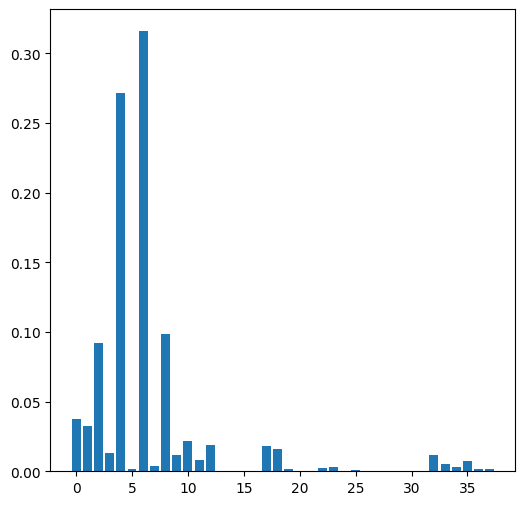

In [30]:
plt.figure(figsize=(6,6))
plt.bar([x for x in range(len(importance))], importance)
plt.show()

In [38]:
loc=[]
for i,v in enumerate(importance):
    if(v<0.01):
        print('Feature: %0d, Score: %.5f' % (i,v))
        loc.append(i)
        
print(len(loc))

Feature: 5, Score: 0.00142
Feature: 7, Score: 0.00381
Feature: 11, Score: 0.00811
Feature: 13, Score: 0.00015
Feature: 14, Score: 0.00000
Feature: 15, Score: 0.00000
Feature: 16, Score: 0.00000
Feature: 19, Score: 0.00130
Feature: 20, Score: 0.00000
Feature: 21, Score: 0.00008
Feature: 22, Score: 0.00254
Feature: 23, Score: 0.00282
Feature: 24, Score: 0.00000
Feature: 25, Score: 0.00082
Feature: 26, Score: 0.00000
Feature: 27, Score: 0.00000
Feature: 28, Score: 0.00000
Feature: 29, Score: 0.00000
Feature: 30, Score: 0.00000
Feature: 31, Score: 0.00000
Feature: 33, Score: 0.00548
Feature: 34, Score: 0.00330
Feature: 35, Score: 0.00705
Feature: 36, Score: 0.00176
Feature: 37, Score: 0.00189
25


In [40]:
print(loc)

[5, 7, 11, 13, 14, 15, 16, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 33, 34, 35, 36, 37]


In [45]:
scaled=scaled.drop(scaled.columns[[5, 7, 11, 13, 14, 15, 16, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 33, 34, 35, 36, 37]],axis = 1)

In [46]:
scaled

,Destination Port,Flow Duration,Total Fwd Packets,Total Length of Fwd Packets,Fwd Packet Length Max,Bwd Packet Length Max,Flow Bytes/s,Flow Packets/s,Flow IAT Mean,Bwd IAT Total,Bwd Packets/s,Min Packet Length,Init_Win_bytes_forward,Label
0,0.837225,1.333333e-07,0.000005,0.000010,0.000242,0.000000,0.087053,0.533333,1.333333e-07,0.000000e+00,0.000000e+00,0.004144,0.000519,BENIGN
1,0.840109,1.016667e-06,0.000000,0.000005,0.000242,0.000307,0.085334,0.403670,1.016667e-06,0.000000e+00,4.587156e-03,0.004144,0.000458,BENIGN
2,0.840124,5.416666e-07,0.000000,0.000005,0.000242,0.000307,0.085387,0.407692,5.416666e-07,0.000000e+00,9.615385e-03,0.004144,0.000458,BENIGN
3,0.705548,3.916666e-07,0.000000,0.000005,0.000242,0.000307,0.085441,0.411765,3.916666e-07,0.000000e+00,1.470588e-02,0.004144,0.000488,BENIGN
4,0.837194,1.333333e-07,0.000005,0.000010,0.000242,0.000000,0.087053,0.533333,1.333333e-07,0.000000e+00,0.000000e+00,0.004144,0.000504,BENIGN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1041894,0.000809,2.685666e-04,0.000015,0.000091,0.001128,0.003891,0.085289,0.400037,5.379999e-05,2.500000e-08,3.104144e-05,0.019337,0.000000,BENIGN
1041895,0.000809,2.808333e-06,0.000005,0.000069,0.001692,0.009268,0.085893,0.402469,1.008333e-06,1.666667e-08,3.086420e-03,0.029006,0.000000,BENIGN
1041896,0.885522,7.916666e-07,0.000005,0.000025,0.001249,0.000307,0.085484,0.407317,4.500000e-07,0.000000e+00,6.097561e-03,0.000000,0.015366,BENIGN
1041897,0.000809,8.738733e-03,0.000025,0.000157,0.001289,0.006554,0.085285,0.400002,1.248483e-03,2.500000e-08,9.536207e-07,0.022099,0.000000,BENIGN


In [51]:
x

,Destination Port,Flow Duration,Total Fwd Packets,Total Length of Fwd Packets,Fwd Packet Length Max,Bwd Packet Length Max,Flow Bytes/s,Flow Packets/s,Flow IAT Mean,Bwd IAT Total,Bwd Packets/s,Min Packet Length,Init_Win_bytes_forward
0,0.837225,1.333333e-07,0.000005,0.000010,0.000242,0.000000,0.087053,0.533333,1.333333e-07,0.000000e+00,0.000000e+00,0.004144,0.000519
1,0.840109,1.016667e-06,0.000000,0.000005,0.000242,0.000307,0.085334,0.403670,1.016667e-06,0.000000e+00,4.587156e-03,0.004144,0.000458
2,0.840124,5.416666e-07,0.000000,0.000005,0.000242,0.000307,0.085387,0.407692,5.416666e-07,0.000000e+00,9.615385e-03,0.004144,0.000458
3,0.705548,3.916666e-07,0.000000,0.000005,0.000242,0.000307,0.085441,0.411765,3.916666e-07,0.000000e+00,1.470588e-02,0.004144,0.000488
4,0.837194,1.333333e-07,0.000005,0.000010,0.000242,0.000000,0.087053,0.533333,1.333333e-07,0.000000e+00,0.000000e+00,0.004144,0.000504
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1041894,0.000809,2.685666e-04,0.000015,0.000091,0.001128,0.003891,0.085289,0.400037,5.379999e-05,2.500000e-08,3.104144e-05,0.019337,0.000000
1041895,0.000809,2.808333e-06,0.000005,0.000069,0.001692,0.009268,0.085893,0.402469,1.008333e-06,1.666667e-08,3.086420e-03,0.029006,0.000000
1041896,0.885522,7.916666e-07,0.000005,0.000025,0.001249,0.000307,0.085484,0.407317,4.500000e-07,0.000000e+00,6.097561e-03,0.000000,0.015366
1041897,0.000809,8.738733e-03,0.000025,0.000157,0.001289,0.006554,0.085285,0.400002,1.248483e-03,2.500000e-08,9.536207e-07,0.022099,0.000000


In [98]:
scaled.shape

(1041899, 14)

<AxesSubplot: >

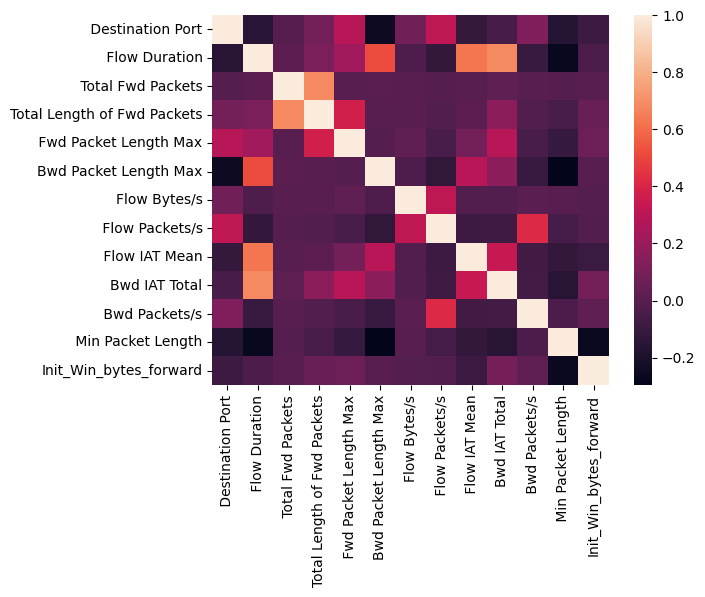

In [96]:
sns.heatmap(x.corr())

In [47]:
y

,BENIGN,DDoS,DoS,PortScan
0,1,0,0,0
1,1,0,0,0
2,1,0,0,0
3,1,0,0,0
4,1,0,0,0
...,...,...,...,...
1041894,1,0,0,0
1041895,1,0,0,0
1041896,1,0,0,0
1041897,1,0,0,0


## Test train split

In [52]:
xtrain, xtest, ytrain, ytest = tra0in_test_split(x, y, random_state=42,test_size=0.3)

## Model Training

In [54]:
clf = RandomForestClassifier()
clf.fit(xtrain,ytrain)
print(clf.score(xtest,ytest))

0.9390024634481876


In [61]:
model_params = {
    'Random Forest': {
        'model': RandomForestClassifier(),
        'params' : {
            'n_estimators': [10, 50, 100, 200, 300, 400, 500],
            'criterion': ['gini', 'entropy', 'log_loss'],
            'max_features': ['None', 'sqrt', 'log2']
        }
    },
    'Decision Tree' : {
        'model': DecisionTreeClassifier(),
        'params': {
            'criterion': ['gini', 'entropy', 'log_loss'],
            'splitter': ['best', 'random'],
            'max_features': ['auto', 'sqrt', 'log2']
        }
    },
}

In [66]:
scores1 = []

for model_name, mp in model_params.items():
    clf =  RandomizedSearchCV(mp['model'], mp['params'], cv=3, return_train_score=False)
    clf.fit(xtrain, ytrain)
    
    scores1.append({
        'model': model_name,
        'best_score': clf.best_score_,
        'best_params': clf.best_params_,
        'accuracy' : clf.score(xtest, ytest)
    })
    
acc1 = pd.DataFrame(scores1,columns=['model','best_score','best_params', 'accuracy'])

C:\Users\prash\anaconda3\envs\gpu\lib\site-packages\sklearn\model_selection\_validation.py:378: FitFailedWarning: 
12 fits failed out of a total of 30.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
12 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\prash\anaconda3\envs\gpu\lib\site-packages\sklearn\model_selection\_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\prash\anaconda3\envs\gpu\lib\site-packages\sklearn\ensemble\_forest.py", line 476, in fit
    trees = Parallel(
  File "C:\Users\prash\anaconda3\envs\gpu\lib\site-packages\joblib\parallel.py", line 1085, in __call__
    if self.dispatch_one_batch(iterator):
  File "C:\Users\

In [67]:
acc1

,model,best_score,best_params,accuracy
0,Random Forest,0.938992,"{'n_estimators': 300, 'max_features': 'log2', ...",0.939095
1,Decision Tree,0.912514,"{'splitter': 'best', 'max_features': 'sqrt', '...",0.910772


In [69]:
maxAccuracy = acc1['accuracy'].max()
bestModel = acc1.loc[acc1['accuracy'] == maxAccuracy]
modelSelect = model_params[bestModel['model'].iloc[0]]
bestModelParameters = bestModel['best_params'].iloc[0]
bestModel

,model,best_score,best_params,accuracy
0,Random Forest,0.938992,"{'n_estimators': 300, 'max_features': 'log2', ...",0.939095


In [70]:
model = modelSelect['model']
model.set_params(**bestModelParameters)

RandomForestClassifier(criterion='log_loss', max_features='log2',
                       n_estimators=300)

In [77]:
from sklearn.neighbors import KNeighborsClassifier
classifier = KNeighborsClassifier(n_neighbors = 5, p = 2)

In [78]:
classifier.fit(xtrain, ytrain)

KNeighborsClassifier()

In [81]:
y_pred = classifier.predict(xtest)

In [102]:
acc=[]
for i in range(3,11,2):
    classifier = KNeighborsClassifier(n_neighbors = i, p = 2)
    classifier.fit(xtrain, ytrain)
    y_pred = classifier.predict(xtest)
    ac = accuracy_score(ytest,y_pred)
    acc.append(ac)

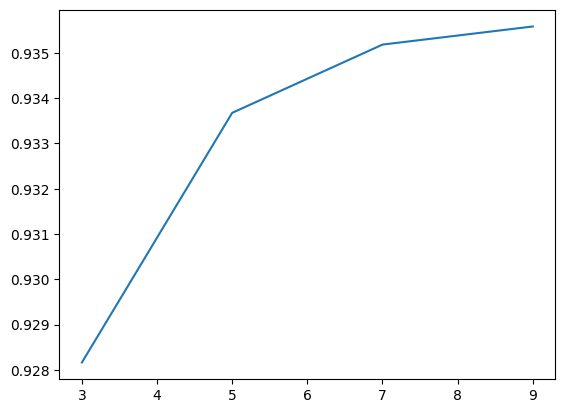

In [105]:
plt.plot([3,5,7,9],acc)

In [103]:
acc

[0.9281632914227214, 0.9336756566529097, 0.935182519115718, 0.935582429535784]

In [85]:
cm = confusion_matrix(ytest.values.argmax(axis=1), y_pred.argmax(axis=1))
ac = accuracy_score(ytest,y_pred)

In [87]:
print(cm)
print()
print(ac)

[[180085    135   5591   2834]
 [   130  38071     15      1]
 [  8911     10  49416     24]
 [  2669      1     18  24659]]

0.9336756566529097


In [88]:
model.fit(xtrain,ytrain)

RandomForestClassifier(criterion='log_loss', max_features='log2',
                       n_estimators=300)

In [89]:
print(model.score(xtest,ytest))

0.9390504526985956


In [90]:
ypred=model.predict(xtest)

In [91]:
cm = confusion_matrix(ytest.values.argmax(axis=1), ypred.argmax(axis=1))

In [92]:
cm

array([[180361,    100,   5588,   2596],
       [   106,  38107,      4,      0],
       [  8121,      0,  50234,      6],
       [  2303,      0,      7,  25037]], dtype=int64)